# Imports

In [1]:


import sys
import os
import datetime
import time
import random
import re
import json
import csv
import pandas as pd
import collections
import matplotlib.font_manager as font_manager
import natsort as ns
import networkx as nx
import glob

import numpy as np
import matplotlib as mpl

DEFAULT_FIGURE_SIZE = 0.9



#labels = ['Manaul', 'PAPI']
#traffic = [12.46, 18.75]

# Function to calculate figure size in LaTeX document
def figsize(scale=DEFAULT_FIGURE_SIZE, extra_width=0.0, extra_height=0.0):
    """Determine a good size for the figure given a scale."""
    fig_width_pt = 469.755  # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0 / 72.27  # Convert pt to inch
    # Aesthetic ratio (you could change this)
    golden_mean = (np.sqrt(5.0) - 1.0) / 2.0
    if scale < 0.7:
        golden_mean *= 1.2
    fig_width = fig_width_pt * inches_per_pt * scale  # width in inches
    fig_height = fig_width * golden_mean  # height in inches
    fig_size = [fig_width + extra_width, fig_height + extra_height]
    return fig_size

figcount = 1
def figsave(file, include_count=False, data=None):
    global figcount
    if not os.path.exists('figs'):
        os.makedirs('figs')
    if include_count:
        file = f'figs/{figcount:02}_{file}'
        figcount += 1
    else:
        file = f'figs/{file}'
    plt.tight_layout()
    plt.savefig(file + '.svg')
    plt.savefig(file + '.pdf')
    if data is not None:
        data.to_csv(file + '.csv')
        
tblcount = 1
def tblsave(file, data, include_count=False):
    global tblcount
    if not os.path.exists('tables'):
        os.makedirs('tables')
    if include_count:
        file = f'tables/{tblcount:02}_{file}.tex'
        tblcount += 1
    else:
        file = f'tables/{file}.tex'
    with open(file, 'w') as fp:
        fp.write(data.to_latex())

# pgf settings for use in LaTeX
latex = {  # setup matplotlib to use latex for output
    "font.family": "serif",
    # "axes.labelsize":  10,
    # "font.size":       10,
    # "legend.fontsize": 10,
    # "xtick.labelsize": 8,
    # "ytick.labelsize": 8,
}
mpl.rcParams.update(latex)
# print(mpl.rcParams.find_all)
import matplotlib.pyplot as plt
import math
import seaborn as sns

from tabulate import tabulate
pd.options.display.max_columns = None
pd.options.display.max_rows = None

title_size = 16

# %matplotlib inline
# %matplotlib notebook



# Read in data

In [2]:

colnames=['app', 'type', 'data'] 

#user1 = pd.read_csv('dataset/1.csv', names=colnames, header=None, skipinitialspace=True)

#data = pd.read_csv('Stats_1Core.txt', names=colnames, header=None, skipinitialspace=True, delimiter=r"\s+")
#data = pd.read_csv('Stats_1Core.txt', delim_whitespace=True)
#data = pd.read_csv("Stats_1Core.txt", header=None, delimiter=r"\s+", skipinitialspace=True)
df = pd.read_csv("Stats_1Core_first.txt", names=colnames, skipinitialspace=True, header=None, sep=":")

#df_user_key_word_org = pd.read_csv("Stats_1Core.txt",
#                                   sep="\s+|;|:|_", skipinitialspace=True, header=None,index_col = False, engine="python",)
                                   #names=my_cols, 
                                   #header=None, 
                                   #engine="python")


print(df.dtypes) 
#display(df)
df= df[~df['app'].str.contains('==')]
df= df[~df['app'].str.contains('jacobi')]
df= df[~df['app'].str.contains('laplace')]
df= df[~df['app'].str.contains('rsbench')]
df= df[~df['app'].str.contains('xsbench')]
#display(df)
#df= df[df['type'].str.contains('Instruc')]

#display(df['data'])


#colnames=['app', 'type', 'data'] 

#user1 = pd.read_csv('dataset/1.csv', names=colnames, header=None, skipinitialspace=True)

#data = pd.read_csv('Stats_1Core.txt', names=colnames, header=None, skipinitialspace=True, delimiter=r"\s+")
#data = pd.read_csv('Stats_1Core.txt', delim_whitespace=True)
#data = pd.read_csv("Stats_1Core.txt", header=None, delimiter=r"\s+", skipinitialspace=True)
df_new = pd.read_csv("Stats_1Core_rsb_xsb.txt", names=colnames, skipinitialspace=True, header=None, sep=":")

#df_user_key_word_org = pd.read_csv("Stats_1Core.txt",
#                                   sep="\s+|;|:|_", skipinitialspace=True, header=None,index_col = False, engine="python",)
                                   #names=my_cols, 
                                   #header=None, 
                                   #engine="python")


print(df_new.dtypes) 
df_new= df_new[~df_new['app'].str.contains('==')]

#display(df_new)

df = df.append(df_new, ignore_index=True)

#display(df)

df_new = pd.read_csv("Stats_1Core_amr_qs.txt", names=colnames, skipinitialspace=True, header=None, sep=":")

#df_user_key_word_org = pd.read_csv("Stats_1Core.txt",
#                                   sep="\s+|;|:|_", skipinitialspace=True, header=None,index_col = False, engine="python",)
                                   #names=my_cols, 
                                   #header=None, 
                                   #engine="python")


print(df_new.dtypes) 
df_new= df_new[~df_new['app'].str.contains('==')]
df_new= df_new[~df_new['app'].str.contains('lulesh')]

#display(df_new)

df = df.append(df_new, ignore_index=True)

display(df)



app      object
type     object
data    float64
dtype: object
app      object
type     object
data    float64
dtype: object
app      object
type     object
data    float64
dtype: object


<ipython-input-2-1e485f504144>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_new, ignore_index=True)
<ipython-input-2-1e485f504144>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_new, ignore_index=True)


,app,type,data
0,lulesh_host_1.txt,Instructions,1.000002e+09
1,lulesh_pim_1.txt,Instructions,1.000009e+09
2,pathfinder_host_1.txt,Instructions,2.000001e+09
3,pathfinder_pim_1.txt,Instructions,1.000008e+09
4,simplemoc_host_1.txt,Instructions,1.000001e+09
5,simplemoc_pim_1.txt,Instructions,1.000004e+09
6,lulesh_host_1.txt,Cycles,5.878490e+08
7,lulesh_pim_1.txt,Cycles,6.890827e+08
8,pathfinder_host_1.txt,Cycles,9.203740e+08
9,pathfinder_pim_1.txt,Cycles,1.044193e+09


# MPKI graph data processing

In [3]:

new_df= df[df['type'].str.contains('MPKI')]

display(new_df)

host= new_df[new_df['app'].str.contains('host')]
pim= new_df[new_df['app'].str.contains('pim')]
display(host)
display(pim)

app_name = host['app'].str.split('_', expand=True)
display(app_name)


app = app_name[0]
host_array = host['data']
pim_array = pim['data']
print (app)
print (host_array)
print (pim_array)




,app,type,data
18,lulesh_host_1.txt,L3 MPKI,0.019311
19,lulesh_pim_1.txt,L3 MPKI,0.000000
20,pathfinder_host_1.txt,L3 MPKI,0.021098
21,pathfinder_pim_1.txt,L3 MPKI,0.000000
22,simplemoc_host_1.txt,L3 MPKI,0.537833
23,simplemoc_pim_1.txt,L3 MPKI,0.000000
60,rsbench_host_1.txt,L3 MPKI,0.082299
61,rsbench_pim_1.txt,L3 MPKI,0.000000
62,xsbench_host_1.txt,L3 MPKI,4.650039
63,xsbench_pim_1.txt,L3 MPKI,0.000000


,app,type,data
18,lulesh_host_1.txt,L3 MPKI,0.019311
20,pathfinder_host_1.txt,L3 MPKI,0.021098
22,simplemoc_host_1.txt,L3 MPKI,0.537833
60,rsbench_host_1.txt,L3 MPKI,0.082299
62,xsbench_host_1.txt,L3 MPKI,4.650039
92,miniamr_host_1.txt,L3 MPKI,0.011522
94,quicksilver_host_1.txt,L3 MPKI,0.029686


,app,type,data
19,lulesh_pim_1.txt,L3 MPKI,0.0
21,pathfinder_pim_1.txt,L3 MPKI,0.0
23,simplemoc_pim_1.txt,L3 MPKI,0.0
61,rsbench_pim_1.txt,L3 MPKI,0.0
63,xsbench_pim_1.txt,L3 MPKI,0.0
93,miniamr_pim_1.txt,L3 MPKI,0.0
95,quicksilver_pim_1.txt,L3 MPKI,0.0


,0,1,2
18,lulesh,host,1.txt
20,pathfinder,host,1.txt
22,simplemoc,host,1.txt
60,rsbench,host,1.txt
62,xsbench,host,1.txt
92,miniamr,host,1.txt
94,quicksilver,host,1.txt


18         lulesh
20     pathfinder
22      simplemoc
60        rsbench
62        xsbench
92        miniamr
94    quicksilver
Name: 0, dtype: object
18    0.019311
20    0.021098
22    0.537833
60    0.082299
62    4.650039
92    0.011522
94    0.029686
Name: data, dtype: float64
19    0.0
21    0.0
23    0.0
61    0.0
63    0.0
93    0.0
95    0.0
Name: data, dtype: float64


# MPKI graph creation

18         lulesh
20     pathfinder
22      simplemoc
60        rsbench
62        xsbench
92        miniamr
94    quicksilver
Name: 0, dtype: object


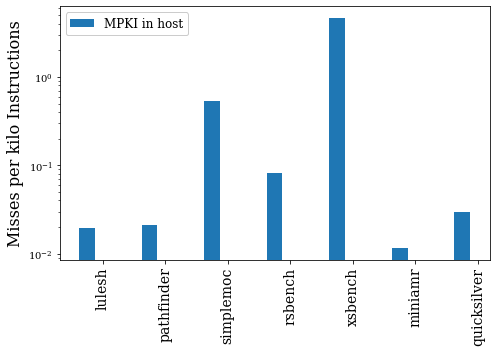

In [4]:
print(app)



#------------------------------ Data processing done

import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

import numpy as np
import matplotlib.patches as mpatches



def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos] + 0.05, height + 3,
                '{}'.format(height), ha=ha[xpos], va='bottom', fontsize=12, rotation=90)



def average(lst):
    return sum(lst) / len(lst)



#plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)



barwidth=.25



x_pos = np.arange(len(app))  # the label locations
barwidth=.25
#barwidth=.15


# Set position of bar on X axis
r1 = np.arange(len(app))
r2 = [x + barwidth for x in r1]
#r3 = [x + barwidth for x in r2]
#r4 = [x + barwidth for x in r3]
#r5 = [x + barwidth for x in r4]

#ax.barh(x_pos, read, hatch='....', color='white', edgecolor='black')
#rects1 = plt.bar(x, traffic, .8, hatch='....', color='white', edgecolor='black')
#rects1=ax.bar(r1, t_8, width=barwidth, hatch='...', color='white', edgecolor='black', label="Tile-8x8")
#rects2=ax.bar(r2, t_16, width=barwidth, hatch='**', color='white', edgecolor='black', label="Tile-16x16")
#rects3=ax.bar(r3, t_32, width=barwidth, hatch='oo', color='cornflowerblue', edgecolor='black', label="Tile-32x32")
#rects4=ax.bar(r4, t_64, width=barwidth, hatch='uu', color='cornflowerblue', edgecolor='black', label="Tile-64x64")

rects1=ax.bar(r1, host_array, width=barwidth,  label="MPKI in host")
#rects2=ax.bar(r2, pim_ipc, width=barwidth,  label="PIM")

#rects3=ax.bar(r3, t_16, width=barwidth,  label="Tile-16x16")
#rects4=ax.bar(r4, t_32, width=barwidth, label="Tile-32x32")
#rects5=ax.bar(r5, t_64, width=barwidth, color='cornflowerblue', label="Tile-64x64")
#rects2=ax.bar(r2, lit, width=barwidth, hatch='///', color='cornflowerblue', edgecolor='black', label="MAPredict_Corrected")

plt.legend(loc="upper left", handlelength=2, fontsize=12, ncol=2, framealpha=1)

#plt.legend(loc="upper right", fontsize=12)


ax.set_ylabel('Misses per kilo Instructions', fontsize=16)
#ax.set_xlabel('Application Name', fontsize=16)

plt.yticks(np.arange(0, max(host_array)+ .5, 1))
#ax.set_ylim(ymin=.5)

#plt.yticks(np.arange(0, max(mapr)+90, 20), color="white")

#ax.set_yticklabels()


#plt.title('', fontsize=18)
#ax.set_xticks(x_pos)

#plt.yticks(fontsize=14)
#ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.xticks([r + barwidth for r in range(len(app))], app, fontsize=14, rotation=90)
#plt.xticks([r + barwidth for r in range(len(mapr))], matrix, fontsize=14, rotation=0)
#plt.xticks([r + barwidth for r in range(len(mapr))], stride, fontsize=14, rotation=90)

#plt.xticks(rotation=45, fontsize=14)

#ax.set_xticklabels(stride, fontsize=12)

#autolabel(rects1, "center")
#autolabel(rects2, "center")
#autolabel(rects3, "center")
#autolabel(rects4, "center")

ax.set_yscale('log')
#ax.set_ylim(1e-1, 1e3)

#ax.invert_yaxis()
plt.tight_layout()

plt.show()
fig.savefig('../figures/mpki.png', dpi=100)





# IPC graph data processing

In [5]:

new_df= df[df['type'].str.contains('IPC')]

display(new_df)

host= new_df[new_df['app'].str.contains('host')]
pim= new_df[new_df['app'].str.contains('pim')]
display(host)
display(pim)

app_name = host['app'].str.split('_', expand=True)
display(app_name)


app = app_name[0]
host_array = host['data'].to_numpy()
pim_array = pim['data'].to_numpy()
print (app)
print (host_array)
print (pim_array)


,app,type,data
12,lulesh_host_1.txt,IPC,1.701120
13,lulesh_pim_1.txt,IPC,1.451218
14,pathfinder_host_1.txt,IPC,2.173031
15,pathfinder_pim_1.txt,IPC,0.957685
16,simplemoc_host_1.txt,IPC,1.849301
17,simplemoc_pim_1.txt,IPC,1.889328
56,rsbench_host_1.txt,IPC,1.479746
57,rsbench_pim_1.txt,IPC,1.405497
58,xsbench_host_1.txt,IPC,1.045197
59,xsbench_pim_1.txt,IPC,1.166386


,app,type,data
12,lulesh_host_1.txt,IPC,1.701120
14,pathfinder_host_1.txt,IPC,2.173031
16,simplemoc_host_1.txt,IPC,1.849301
56,rsbench_host_1.txt,IPC,1.479746
58,xsbench_host_1.txt,IPC,1.045197
88,miniamr_host_1.txt,IPC,1.989899
90,quicksilver_host_1.txt,IPC,1.976313


,app,type,data
13,lulesh_pim_1.txt,IPC,1.451218
15,pathfinder_pim_1.txt,IPC,0.957685
17,simplemoc_pim_1.txt,IPC,1.889328
57,rsbench_pim_1.txt,IPC,1.405497
59,xsbench_pim_1.txt,IPC,1.166386
89,miniamr_pim_1.txt,IPC,1.712151
91,quicksilver_pim_1.txt,IPC,1.685690


,0,1,2
12,lulesh,host,1.txt
14,pathfinder,host,1.txt
16,simplemoc,host,1.txt
56,rsbench,host,1.txt
58,xsbench,host,1.txt
88,miniamr,host,1.txt
90,quicksilver,host,1.txt


12         lulesh
14     pathfinder
16      simplemoc
56        rsbench
58        xsbench
88        miniamr
90    quicksilver
Name: 0, dtype: object
[1.70112015 2.17303078 1.8493013  1.47974632 1.04519713 1.98989902
 1.97631267]
[1.45121795 0.95768484 1.88932849 1.40549659 1.166386   1.71215089
 1.68568998]


# IPC graph creation

12         lulesh
14     pathfinder
16      simplemoc
56        rsbench
58        xsbench
88        miniamr
90    quicksilver
Name: 0, dtype: object
[1.70112015 2.17303078 1.8493013  1.47974632 1.04519713 1.98989902
 1.97631267]
[1.45121795 0.95768484 1.88932849 1.40549659 1.166386   1.71215089
 1.68568998]


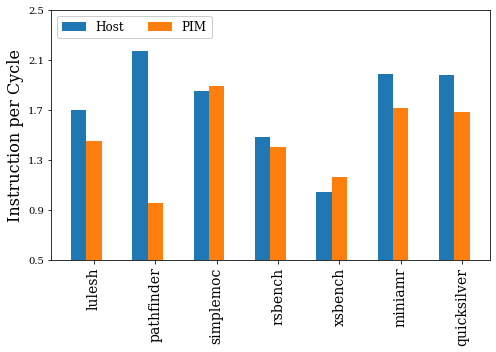

In [6]:

#------------------------------ Data processing done

import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

import numpy as np
import matplotlib.patches as mpatches



def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos] + 0.05, height + 3,
                '{}'.format(height), ha=ha[xpos], va='bottom', fontsize=12, rotation=90)



def average(lst):
    return sum(lst) / len(lst)



#plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)



barwidth=.25



x_pos = np.arange(len(app))  # the label locations
barwidth=.25
#barwidth=.15


# Set position of bar on X axis
r1 = np.arange(len(app))
r2 = [x + barwidth for x in r1]
#r3 = [x + barwidth for x in r2]
#r4 = [x + barwidth for x in r3]
#r5 = [x + barwidth for x in r4]

#ax.barh(x_pos, read, hatch='....', color='white', edgecolor='black')
#rects1 = plt.bar(x, traffic, .8, hatch='....', color='white', edgecolor='black')
#rects1=ax.bar(r1, t_8, width=barwidth, hatch='...', color='white', edgecolor='black', label="Tile-8x8")
#rects2=ax.bar(r2, t_16, width=barwidth, hatch='**', color='white', edgecolor='black', label="Tile-16x16")
#rects3=ax.bar(r3, t_32, width=barwidth, hatch='oo', color='cornflowerblue', edgecolor='black', label="Tile-32x32")
#rects4=ax.bar(r4, t_64, width=barwidth, hatch='uu', color='cornflowerblue', edgecolor='black', label="Tile-64x64")


print(app)
print(host_array)
print(pim_array)


rects1=ax.bar(r1, host_array, width=barwidth,  label="Host")
rects2=ax.bar(r2, pim_array, width=barwidth,  label="PIM")

#rects3=ax.bar(r3, t_16, width=barwidth,  label="Tile-16x16")
#rects4=ax.bar(r4, t_32, width=barwidth, label="Tile-32x32")
#rects5=ax.bar(r5, t_64, width=barwidth, color='cornflowerblue', label="Tile-64x64")
#rects2=ax.bar(r2, lit, width=barwidth, hatch='///', color='cornflowerblue', edgecolor='black', label="MAPredict_Corrected")

plt.legend(loc="upper left", handlelength=2, fontsize=12, ncol=2, framealpha=1)

#plt.legend(loc="upper right", fontsize=12)


ax.set_ylabel('Instruction per Cycle', fontsize=16)
#ax.set_xlabel('Application Name', fontsize=16)

plt.yticks(np.arange(0.5, max(host_array)+ .4, .4))
ax.set_ylim(ymin=.5)

#plt.yticks(np.arange(0, max(mapr)+90, 20), color="white")

#ax.set_yticklabels()


#plt.title('', fontsize=18)
#ax.set_xticks(x_pos)

#plt.yticks(fontsize=14)
#ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.xticks([r + barwidth for r in range(len(app))], app, fontsize=14, rotation=90)

#ax.set_yscale('log')
#ax.set_ylim(1e-1, 1e3)

#ax.invert_yaxis()
plt.tight_layout()

plt.show()
fig.savefig('../figures/ipc.png', dpi=100)





# LFMR graph data processing 

In [7]:

new_df= df[df['type'].str.contains('LFMR')]

display(new_df)

host= new_df[new_df['app'].str.contains('host')]
pim= new_df[new_df['app'].str.contains('pim')]
display(host)
display(pim)

app_name = host['app'].str.split('_', expand=True)
display(app_name)


app = app_name[0]
host_array = host['data'].to_numpy()
pim_array = pim['data'].to_numpy()
print (app)
print (host_array)
print (pim_array)


,app,type,data
42,lulesh_host_1.txt,LFMR,0.005603
43,lulesh_pim_1.txt,LFMR,0.000000
44,pathfinder_host_1.txt,LFMR,0.002004
45,pathfinder_pim_1.txt,LFMR,0.000000
46,simplemoc_host_1.txt,LFMR,0.700247
47,simplemoc_pim_1.txt,LFMR,0.000000
76,rsbench_host_1.txt,LFMR,0.065885
77,rsbench_pim_1.txt,LFMR,0.000000
78,xsbench_host_1.txt,LFMR,0.669040
79,xsbench_pim_1.txt,LFMR,0.000000


,app,type,data
42,lulesh_host_1.txt,LFMR,0.005603
44,pathfinder_host_1.txt,LFMR,0.002004
46,simplemoc_host_1.txt,LFMR,0.700247
76,rsbench_host_1.txt,LFMR,0.065885
78,xsbench_host_1.txt,LFMR,0.669040
108,miniamr_host_1.txt,LFMR,0.003998
110,quicksilver_host_1.txt,LFMR,0.165699


,app,type,data
43,lulesh_pim_1.txt,LFMR,0.0
45,pathfinder_pim_1.txt,LFMR,0.0
47,simplemoc_pim_1.txt,LFMR,0.0
77,rsbench_pim_1.txt,LFMR,0.0
79,xsbench_pim_1.txt,LFMR,0.0
109,miniamr_pim_1.txt,LFMR,0.0
111,quicksilver_pim_1.txt,LFMR,0.0


,0,1,2
42,lulesh,host,1.txt
44,pathfinder,host,1.txt
46,simplemoc,host,1.txt
76,rsbench,host,1.txt
78,xsbench,host,1.txt
108,miniamr,host,1.txt
110,quicksilver,host,1.txt


42          lulesh
44      pathfinder
46       simplemoc
76         rsbench
78         xsbench
108        miniamr
110    quicksilver
Name: 0, dtype: object
[0.00560269 0.00200439 0.70024686 0.06588537 0.66904037 0.00399847
 0.16569917]
[0. 0. 0. 0. 0. 0. 0.]


# LFMR graph creation

42          lulesh
44      pathfinder
46       simplemoc
76         rsbench
78         xsbench
108        miniamr
110    quicksilver
Name: 0, dtype: object


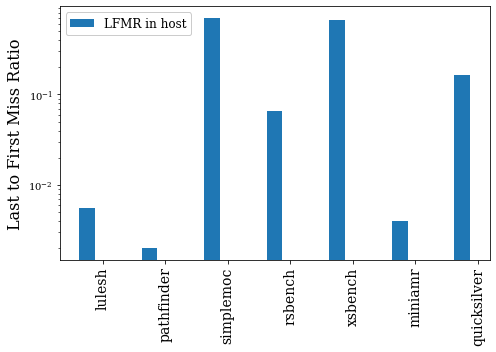

In [8]:
print(app)



#------------------------------ Data processing done

import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

import numpy as np
import matplotlib.patches as mpatches



def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos] + 0.05, height + 3,
                '{}'.format(height), ha=ha[xpos], va='bottom', fontsize=12, rotation=90)



def average(lst):
    return sum(lst) / len(lst)



#plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)



barwidth=.25



x_pos = np.arange(len(app))  # the label locations
barwidth=.25
#barwidth=.15


# Set position of bar on X axis
r1 = np.arange(len(app))
r2 = [x + barwidth for x in r1]
#r3 = [x + barwidth for x in r2]
#r4 = [x + barwidth for x in r3]
#r5 = [x + barwidth for x in r4]

#ax.barh(x_pos, read, hatch='....', color='white', edgecolor='black')
#rects1 = plt.bar(x, traffic, .8, hatch='....', color='white', edgecolor='black')
#rects1=ax.bar(r1, t_8, width=barwidth, hatch='...', color='white', edgecolor='black', label="Tile-8x8")
#rects2=ax.bar(r2, t_16, width=barwidth, hatch='**', color='white', edgecolor='black', label="Tile-16x16")
#rects3=ax.bar(r3, t_32, width=barwidth, hatch='oo', color='cornflowerblue', edgecolor='black', label="Tile-32x32")
#rects4=ax.bar(r4, t_64, width=barwidth, hatch='uu', color='cornflowerblue', edgecolor='black', label="Tile-64x64")

rects1=ax.bar(r1, host_array, width=barwidth,  label="LFMR in host")
#rects2=ax.bar(r2, pim_ipc, width=barwidth,  label="PIM")

#rects3=ax.bar(r3, t_16, width=barwidth,  label="Tile-16x16")
#rects4=ax.bar(r4, t_32, width=barwidth, label="Tile-32x32")
#rects5=ax.bar(r5, t_64, width=barwidth, color='cornflowerblue', label="Tile-64x64")
#rects2=ax.bar(r2, lit, width=barwidth, hatch='///', color='cornflowerblue', edgecolor='black', label="MAPredict_Corrected")

plt.legend(loc="upper left", handlelength=2, fontsize=12, ncol=2, framealpha=1)

#plt.legend(loc="upper right", fontsize=12)


ax.set_ylabel('Last to First Miss Ratio', fontsize=16)
#ax.set_xlabel('Application Name', fontsize=16)

plt.yticks(np.arange(0, max(host_array), .1))
#ax.set_ylim(ymin=.5)

#plt.yticks(np.arange(0, max(mapr)+90, 20), color="white")

#ax.set_yticklabels()


#plt.title('', fontsize=18)
#ax.set_xticks(x_pos)

#plt.yticks(fontsize=14)
#ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.xticks([r + barwidth for r in range(len(app))], app, fontsize=14, rotation=90)
#plt.xticks([r + barwidth for r in range(len(mapr))], matrix, fontsize=14, rotation=0)
#plt.xticks([r + barwidth for r in range(len(mapr))], stride, fontsize=14, rotation=90)

#plt.xticks(rotation=45, fontsize=14)

#ax.set_xticklabels(stride, fontsize=12)

#autolabel(rects1, "center")
#autolabel(rects2, "center")
#autolabel(rects3, "center")
#autolabel(rects4, "center")

ax.set_yscale('log')
#ax.set_ylim(1e-1, 1e3)

#ax.invert_yaxis()
plt.tight_layout()

plt.show()
fig.savefig('../figures/lfmr.png', dpi=100)



